In [1]:
import numpy as np
import pandas as pd

**Reading** **Dataset**

In [2]:
path ="/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv"
df = pd.read_csv(path)

In [3]:

df.head() #show top few rows of data

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [4]:
df.tail() #show bottom few rows of data

,Date,Open,High,Low,Close,Volume,Stock Trading
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000
1225,2012-01-04,14050,14050,13700,13720,559100,7719804000


In [5]:
df = df['High']
df.head()

0    42330
1    43220
2    43970
3    43700
4    43660
Name: High, dtype: int64


Ploting the time series

In [6]:
import matplotlib.pyplot as plt

def plot_series(data):
  for df in data :
    plt.plot(df)
  plt.show()

Splitting the dataset in Train and Test set

In [7]:
# Using 80% of the dataset for training and rest for testing
train = df[:int(0.8*len(df))]
test = df[int(0.8*len(df)) :]

Reshaping the data into the required form to be fed into the RNN

In [8]:
def arrange(data,window=10):
  x = []
  y = []

  for i,val in enumerate(data):
    if i<window:
      continue
    x.append(data[i-window :i-1].values.reshape(-1,1))
    y.append(data[i:i+1].values.reshape(-1,1))

  x = np.asarray(x)
  y = np.asarray(y)

  return x,y

In [9]:
x_train, y_train = arrange(train,15)
print("x_shape is: {} and y-shape is: {}".format(x_train.shape , y_train.shape))

x_shape is: (965, 14, 1) and y-shape is: (965, 1, 1)


In [10]:
print(x_train[0])
print(y_train[0])

[[42330]
 [43220]
 [43970]
 [43700]
 [43660]
 [43840]
 [44370]
 [43630]
 [43150]
 [43550]
 [43880]
 [43440]
 [43300]
 [44000]]
[[41560]]


**Building the Model**

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Input

In [12]:
x_train.shape[1:]

(14, 1)

In [13]:
Netp = Sequential()
Netp.add(SimpleRNN(3,activation='relu',input_shape=x_train.shape[1:]))
Netp.add(Dense(1,activation='relu'))

Netp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [14]:
Netp.compile(loss = 'mean_squared_error',optimizer='adam',metrics=['mse'])

In [15]:
Netp.fit(x_train, y_train, epochs=10)

Epoch 1/10
31/31 [==============================] - 1s 3ms/step - loss: 605121024.0000 - mse: 605121024.0000
Epoch 2/10
31/31 [==============================] - 0s 4ms/step - loss: 498028704.0000 - mse: 498028704.0000
Epoch 3/10
31/31 [==============================] - 0s 3ms/step - loss: 390620352.0000 - mse: 390620352.0000
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 287536928.0000 - mse: 287536928.0000
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 194178832.0000 - mse: 194178832.0000
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 115657952.0000 - mse: 115657952.0000
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 59678244.0000 - mse: 59678244.0000
Epoch 8/10
31/31 [==============================] - 0s 4ms/step - loss: 25733682.0000 - mse: 25733682.0000
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 9454829.0000 - mse: 9454829.0000
Epoch 10/10
31/31 [========

In [16]:
x_test, y_test, = arrange(test, 15)
print ("x-test is: {} and  y-test is: {}".format(x_test.shape, y_test.shape))

x-test is: (231, 14, 1) and  y-test is: (231, 1, 1)


In [17]:
print(x_test[0])
print(y_test[0])

[[21170]
 [20770]
 [20710]
 [20880]
 [21330]
 [20840]
 [20910]
 [20120]
 [20260]
 [19860]
 [19700]
 [19460]
 [19360]
 [19420]]
[[18990]]


In [18]:
x_test, y_test, = arrange(test, 15) 
pred = Netp.predict(x_test) 
pred

array([[18977.979],
       [18886.129],
       [18676.26 ],
       [18656.055],
       [18473.643],
       [18235.09 ],
       [18215.934],
       [18124.271],
       [17920.498],
       [17625.574],
       [17398.104],
       [17244.668],
       [17143.701],
       [16996.592],
       [16705.314],
       [16599.7  ],
       [16703.77 ],
       [16611.154],
       [16708.16 ],
       [16847.729],
       [17015.658],
       [17019.791],
       [17009.33 ],
       [17149.87 ],
       [17239.873],
       [17467.102],
       [17584.307],
       [17581.045],
       [17591.84 ],
       [17505.635],
       [17303.953],
       [17076.082],
       [16856.24 ],
       [16705.73 ],
       [16684.182],
       [16404.89 ],
       [16075.002],
       [15990.723],
       [16187.291],
       [16985.379],
       [17592.406],
       [17969.613],
       [18029.865],
       [17944.549],
       [17899.8  ],
       [17611.621],
       [17748.11 ],
       [17884.74 ],
       [17786.535],
       [17754.918],


### **Comparing predictions with the actual value using plot**


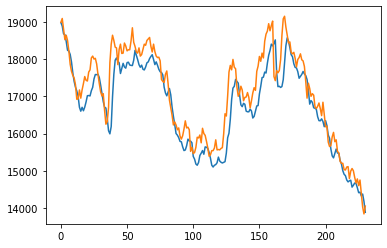

In [19]:
plot_series([pred[:,0],y_test[:,:,0]])

The plot in blue represents the predicted value by the model for the test dataset (pred), while the plot in orange represents the actual value of the test dataset (y_test).

So now our model works good with epochs=10 as pred values are almost closer to the actual value.